# DAO2702 Final Project
Tutorial: T-01  
Group: Bubble Tea  
Members: Anni Lei, Friscilia Sultan, Isaiah Koh, Stefan Jiang, Mao Zhi, Ng Zi Wei

## Overview
Our team project seeks to analyse a dataset containing the information of 10,000 credit card customers from a bank. The data was obtained from https://www.kaggle.com/sakshigoyal7/credit-card-customers. The scenario presented is: "A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction"

Our team project aims to **produce visualisations from the data in order to identify potential indicators for customers who are likely to be churned, and apply statistical models to test our hypotheses.**

## Dataset
Our dataset consists of 10127 customers with 21 variables per customer.

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('BankChurners.csv')
data.drop(data.columns[21], axis=1, inplace=True)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Exploratory Data Analysis
We first begin by performing some exploratory data analysis to identify any initial patterns or anomalies potentially present in the data. Using the code below, we can see the range of our data values and see how the different variables are distributed.

In [146]:
unique_vals = [np.sort(data[col].unique()) for col in data]

(_, attri_range, age_range, gender_range, depend_range, edu_range, marital_range, income_range, 
 card_range, onbook_range, relationship_range, inactive_range, contacts_range, limit_range, 
 revolving_range, open_range, amtchange_range , transamt_range, transct_range, ctchange_range, 
 util_range) = unique_vals

for val_range, col_head in zip(unique_vals, data.columns):
    count += 1
    if val_range.dtype == "int64":
        print("{0}: {1:d} - {2:d}".format(col_head, val_range.min(), val_range.max()))
    elif val_range.dtype == "float":
        print("{0}: {1:.3f} - {2:.3f}".format(col_head, val_range.min(), val_range.max()))
    else:
        print("{0}: {1}".format(col_head, val_range))

CLIENTNUM: 708082083 - 828343083
Attrition_Flag: ['Attrited Customer' 'Existing Customer']
Customer_Age: 26 - 73
Gender: ['F' 'M']
Dependent_count: 0 - 5
Education_Level: ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status: ['Divorced' 'Married' 'Single' 'Unknown']
Income_Category: ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Platinum' 'Silver']
Months_on_book: 13 - 56
Total_Relationship_Count: 1 - 6
Months_Inactive_12_mon: 0 - 6
Contacts_Count_12_mon: 0 - 6
Credit_Limit: 1438.300 - 34516.000
Total_Revolving_Bal: 0 - 2517
Avg_Open_To_Buy: 3.000 - 34516.000
Total_Amt_Chng_Q4_Q1: 0.000 - 3.397
Total_Trans_Amt: 510 - 18484
Total_Trans_Ct: 10 - 139
Total_Ct_Chng_Q4_Q1: 0.000 - 3.714
Avg_Utilization_Ratio: 0.000 - 0.999


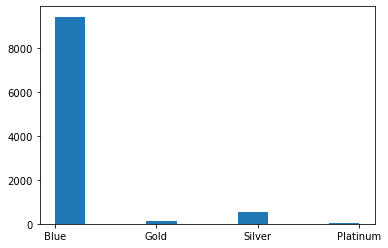

In [144]:
plt.hist(data['Card_Category'])
plt.show()